## Introduction

#### Dementia
~~

#### Alzheimer
~~

## 1. Data



**[Summary]**

1. The present MRI data set consists of a longitudinal collection of 150 subjects aged 60 to 96 years all acquired on the same scanner using identical sequences. 


2. Each subject was scanned on two or more visits, separated by at least 1 year for a total of 373 imaging sessions.


3.  Seventy-two of the subjects were characterized as nondemented throughout the study. 


4. Sixty-four of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with CDR 0.5


5. Another 14 subjects were characterized as nondemented at the time of their initial visit (CDR 0) and were subsequently characterized as demented at a later visit (CDR > 0). 


6. The subjects were all right-handed


7. Men (n = 62) & Women (n = 88)



**[Description]**

|Name|Description|
|---|---|
|ID|Identification|
|M/F|Gender|
|Hand|Handedness|
|Age|Age|
|EDUC|Years of education|
|SES|Socioeconomic Status|
|MMSE|Mini Mental State Examination|
|CDR|Clinical Dementia Rating|
|eTIV|Estimated Total Intracranial Volume|
|nWBV|Normalize Whole Brain Volume|
|ASF|Atlas Scaling Factor|

## 2. Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("/content/drive/MyDrive/Project/oasis_longitudinal.csv")
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [ ]:
data.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


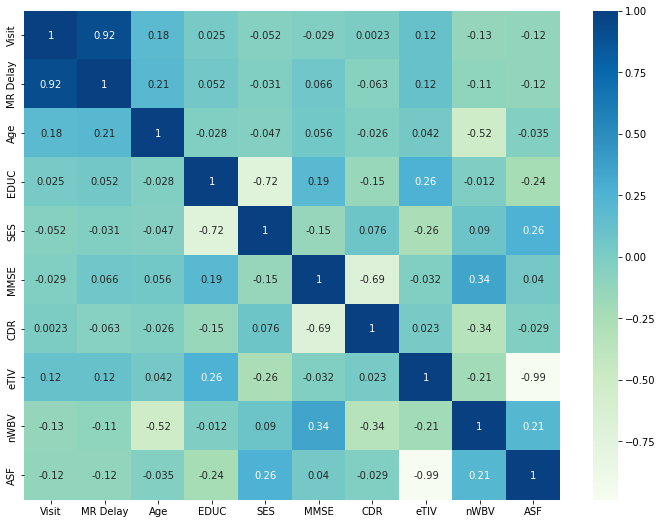

In [ ]:
corr = data.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr, cmap = 'GnBu', xticklabels = corr.columns.values,
            yticklabels = corr.columns.values, annot=True);

In [ ]:
# Drop unnecessary columns
df = data.drop(['MRI ID','Visit','MR Delay','Hand'], axis=1)

In [ ]:
df['Group'] = df['Group'].replace(['Nondemented', 'Demented', 'Converted'], [0,1,2])

In [ ]:
df.head()

,Subject ID,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,0,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,1,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,1,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,1,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
def bar_chart(feature):
    Nondemented = df[df['Group']==0][feature].value_counts()
    Demented = df[df['Group']==1][feature].value_counts()
    Converted = df[df['Group']==2][feature].value_counts()

    df_bar = pd.DataFrame([Converted, Demented, Nondemented])
    df_bar.index = ['Converted', 'Demented', 'Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))

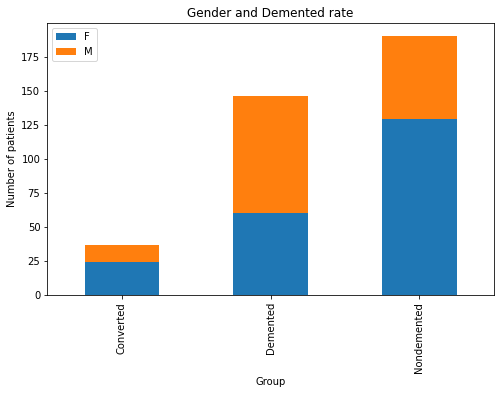

In [ ]:
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')
plt.show();

group에는 converted가 포함되어 있기 때문에 정확히 치매 환자 의 수를 파악하기 힘들다. <br>따라서 group변수와 다른 변수들의 관계를 파악하기 보다 CDR을 직접적으로 활용해서 
<br>환자 수를 파악하는 것이 더 정확할 것이다.

 ⚡ **CDR 지표**

- CDR = 0 : 치매가 아님
- CDR = 0.5 : 치매가 의심스러움, 매우 경도의 치매
- CDR = 1 : 경도 치매
- CDR = 2 : 중증도의 치매


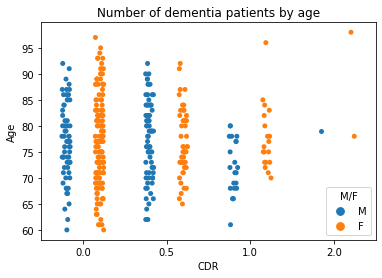

In [ ]:
# 성별과 나이에 따른 CDR 분포
sns.stripplot(x=df['CDR'], y=df['Age'], hue=df['M/F'], jitter=True, dodge=True)
plt.title('Number of dementia patients by age')
plt.show();

**_[성별과 나이에 따른 치매 수준 ]_**

- 치매는 대부분 70-80세 사이에서 가장 많이 관찰 된다.
- 여성들보다 남성들이 치매에 걸릴 가능성이 더 높다.
- 여성들보다 남성들은 이른 나이에 치매가 발병하는 양상을 보인다.

In [ ]:
# 시각화 함수 생성
# CDR에 따른 변수들의 분포 시각화 함수
def strip_plot(feature):
    plot = sns.stripplot(x=df['CDR'], y=df[feature])

In [ ]:
def strip_plot_sex(feature):
    plot = sns.stripplot(x=df['CDR'], y=df[feature], hue=df['M/F'], jitter=True, dodge=True)

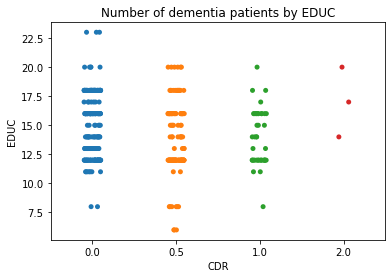

In [ ]:
strip_plot('EDUC')
plt.title('Number of dementia patients by EDUC')
plt.show();

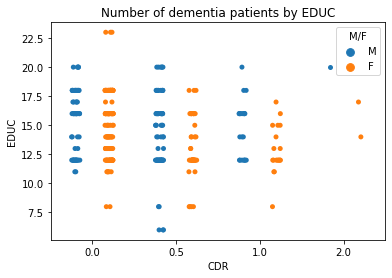

In [ ]:
strip_plot_sex('EDUC')
plt.title('Number of dementia patients by EDUC')
plt.show();

In [ ]:
import plotly.express as px

In [ ]:
def plotly_scatter(continue_types):
    fig = px.scatter(df, x = df['CDR'], y = df[continue_types], color = df['M/F'], 
                     color_continuous_scale = px.colors.qualitative.Dark2, title= 'Correlation with CDR')
    fig.show();

In [ ]:
def plotly_box(continue_types):
    fig = px.box(df, y = df[continue_types], color = df['CDR'], 
                     color_discrete_sequence = px.colors.qualitative.Dark2, title= 'Correlation with CDR')
    fig.show();

In [ ]:
plotly_scatter('EDUC')

In [ ]:
plotly_box('EDUC')

**_[교육수준에 따른 치매 수준 ]_**

- 보통 12년 ~ 16년의 교육 수준을 가진 사람들의 발병 확률이 높다
- 여성에 비해 남성의 발명 연령은 광범위함과 동시에 교육 수준이 높은 사람들에게서 <br> 
발병 확률이 높은 것으로 보인다.
- `CDR = 2` 에 해당하는 환자들의 교육 수준은 최소 14로 높은 편에 해당한다.
<br> 위 분석에 따르면 교육 수준과 치매 발병 여부, 그 수준은 상관관계가 없다고 봐도 무방하다.



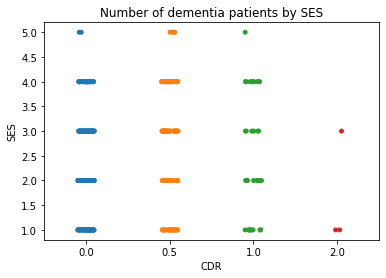

In [ ]:
strip_plot('SES')
plt.title('Number of dementia patients by SES')
plt.show();

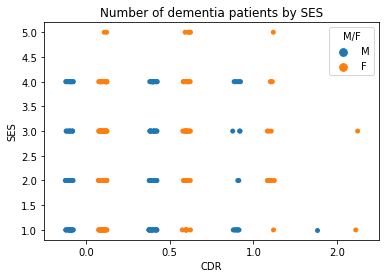

In [ ]:
strip_plot_sex('SES')
plt.title('Number of dementia patients by SES')
plt.show();

In [ ]:
plotly_scatter('SES')

In [ ]:
plotly_box('SES')

**_[사회경제적지위에 따른 치매 수준 ]_**

- `CDR = 2`인 중증 치매 환자들의 사회경제적 지위 수준은 낮은 편이다.
- 치매가 아닌 검사자들과 의심, 경증 정도의 환자들의 사회경제적 지위 수준이 비슷하다.
- 따라서 사회경제적 지위 역시 치매 발병 여부와 그 수준과는 상관관계가 없다고 판단한다.

 ⚡ **MMSE 지표**

- 27-30점: 정상 = `CDR: 0`
- 26-27점: 경도 인지 장애 = `CDR: 0` 또는 `CDR: 0.5`
- 23-24점: 정밀검사 필요 = `CDR: 0` 또는`CDR: 0.5`
- 20-23점: 경증 = `CDR: 1`
- 10-19점: 중증도 = `CDR: 2`

<br>

🔖 **CDR 지표와 MMSE 점수 관계 정리**

- 24점 이상일때 정상으로 즉, Normal로 판단한다. `CDR = 0`, `CDR = 0.5`
- 20 - 23점 일 때는 경도 즉, Mild 치매라고 판단한다. `CDR = 1`
- 10 - 19점 이하일 때는 확정적 중증도 즉, Moderate 치매라고 판단한다. `CDR = 2`

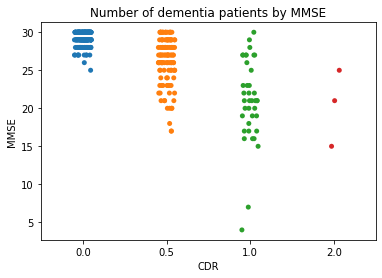

In [ ]:
strip_plot('MMSE')
plt.title('Number of dementia patients by MMSE')
plt.show();

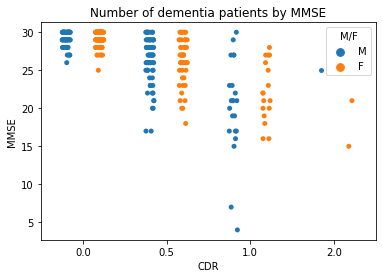

In [ ]:
strip_plot_sex('MMSE')
plt.title('Number of dementia patients by MMSE')
plt.show();

In [ ]:
plotly_scatter('MMSE')

In [ ]:
plotly_box('MMSE')

In [ ]:
# 교육 기간과 간이정신검사 점수의 상관관계
#양의 상관관계
#교육 기간이 길수록 점수가 높아지는 경향이 있음
#예외적인 검사자가 발생
#치매로 진단된 환자가 점수가 높은 경우 or  그 반대
fig = px.scatter(df, x = df['EDUC'], y = df['MMSE'], color = df['M/F'], trendline="ols", title='Correlation between EDUC and MMSE')
fig.show();

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



**_[간이정신검사에 따른 치매 수준 ]_**

- 치매 여부와 그 수준이 높아질수록 점수가 낮은 쪽에 형성되어있음
- 정상이거나 치매 의심, 경도인지장애 또는 정밀검사 필요에 해당하는 검사자 중  <br>MMSE 점수가 떨어지는 경우가 있는데, 이는 여러 요인이 작용해서 발생한 것으로 판단한다.

ex. 연령, 교육 기간 등을 포함한 검사자들의 `내부적 요인`으로 인한 차이
<br> ex. 우울증으로 인한 일시적인 인지 장애 등인 `외부적 요인`으로 인한 차이




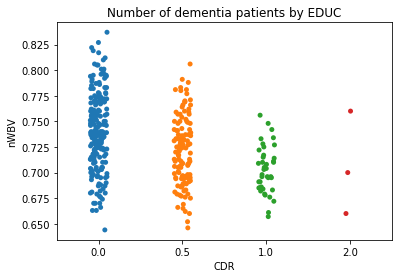

In [ ]:
strip_plot('nWBV')
plt.title('Number of dementia patients by EDUC')
plt.show();

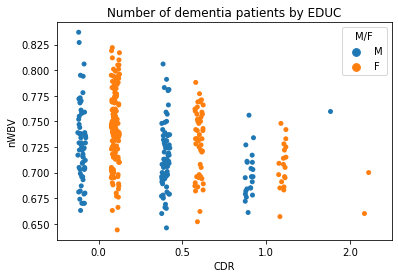

In [ ]:
strip_plot_sex('nWBV')
plt.title('Number of dementia patients by EDUC')
plt.show();

In [ ]:
plotly_scatter('nWBV')

In [ ]:
plotly_box('nWBV')

In [ ]:
fig = px.scatter(df, x = df['nWBV'], y = df['Age'], color = df['M/F'], trendline="ols", title='Correlation between nWBV and Age')
fig.show();

**_[정규화된 전체 뇌 부피에 따른 치매 수준 ]_**

- 뇌 부피가 작을수록 치매 발병 확률이 높다.
- 뇌 부피는 나이와 음의 상관관계를 가지고 있다.
<br> = 나이가 많을수록 뇌 부피는 줄어든다.
- 예외적인 검사자들은 `내부적 요인 (ex.나이)`로 인해 나타났을 확률이 있다.

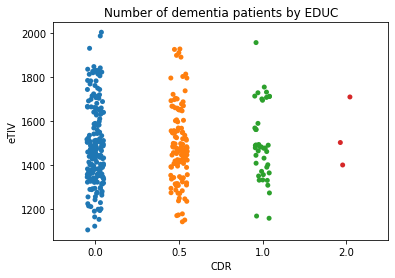

In [ ]:
strip_plot('eTIV')
plt.title('Number of dementia patients by EDUC')
plt.show();

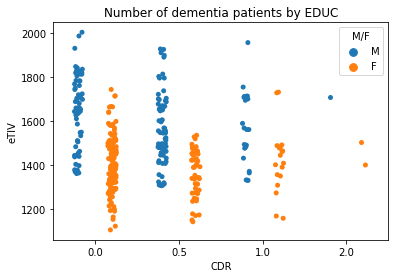

In [ ]:
strip_plot_sex('eTIV')
plt.title('Number of dementia patients by EDUC')
plt.show();

In [ ]:
plotly_scatter('eTIV')

In [ ]:
plotly_box('eTIV')

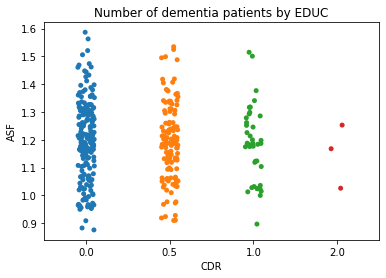

In [ ]:
strip_plot('ASF')
plt.title('Number of dementia patients by EDUC')
plt.show();

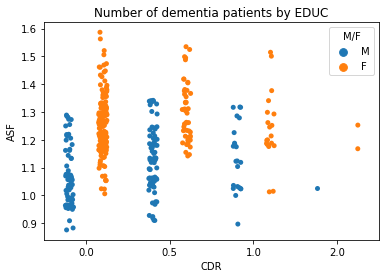

In [ ]:
strip_plot_sex('ASF')
plt.title('Number of dementia patients by EDUC')
plt.show();

In [ ]:
plotly_scatter('ASF')

In [ ]:
plotly_box('ASF')

In [ ]:
fig = px.scatter(df, x = df['ASF'], y = df['eTIV'], color = df['M/F'], trendline="ols", title='Correlation between ASF and eTIV')
fig.show();

**ASF** = 인체 해부학적 차이를 기반으로 추정된 총 두개내 용적(eTIV)을 비교할 수 있는 스케일링 인자

**_[eTIV, ASF에 따른 치매 수준 ]_**

- eTIV와 ASF는 음의 상관관계를 가진다.
<br>두개 내 용적이 작을수록 스케일링 인자가 크다.
- 두개 내 용적은 여자보다 남자가 큰 수치를 보이는데 이는 생물학적 차이로 판단한다.
- 위 분석 결과를 확인했을 떄, 두개 내 용적은 치매 발병 여부, 그 수준과 관련이 없다.

## 3. Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df['CDR'].replace(to_replace=0.0, value='A', inplace=True)
df['CDR'].replace(to_replace=0.5, value='B', inplace=True)
df['CDR'].replace(to_replace=1.0, value='C', inplace=True)
df['CDR'].replace(to_replace=2.0, value='D', inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
for x in df.columns:
    f = LabelEncoder()
    df[x] = f.fit_transform(df[x])

In [ ]:
train, test = train_test_split(df, test_size=0.3)

In [ ]:
x_train = train[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
y_train = train.CDR
x_test = test[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
y_test = test.CDR

In [ ]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(x_train)

# Scale the train set
x_train = scaler.transform(x_train)

# Scale the test set
x_test = scaler.transform(x_test)

In [ ]:
y_train=np.ravel(y_train)
x_train=np.asarray(x_train)

y_test=np.ravel(y_test)
x_test=np.asarray(x_test)

In [ ]:
#Metrics
def evaluation(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}, AUC: {3:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

### Decision Tree Model


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=12)
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy of Decision Tree: {0:.4f}'.format(accuracy))

Accuracy of Decision Tree: 0.6339


### Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy of Random Forest: {0:.4f}'.format(accuracy))

Accuracy of Random Forest: 0.7679


### Gradient Boosting Machine


In [ ]:
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(x_train, y_train)
pred = gb_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy of Gradient Boosting Machine: {0:.4f}'.format(accuracy))

Accuracy of Gradient Boosting Machine: 0.7768


### LightGBM

In [ ]:
from lightgbm import LGBMClassifier
lgbm_wrapper = LGBMClassifier(n_estimators=400)

evals = [(x_test, y_test)]
lgbm_wrapper.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='logloss',
                 eval_set=evals, verbose=False)
preds = lgbm_wrapper.predict(x_test)
pred_proba = lgbm_wrapper.predict_proba(x_test)[:,1]

accuracy = accuracy_score(y_test, preds)
print('Accuracy of LGBM: {0:.4f}'.format(accuracy))

Accuracy of LGBM: 0.7679
